[array([240.10379903, 240.07439586, 240.05074182]),
 array([41.1398876 , 39.92637732, 42.37896946]),
 array([186.08550667, 149.56413001, 117.82093167])]

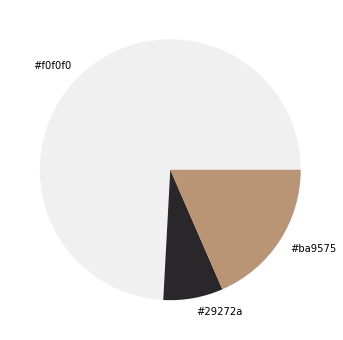

In [18]:
# Identifying prominent colors from image

# Import Libraries
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import cv2
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
import os
import webcolors
# (R,G,B) to hexadecimal converter function
def RGB2HEX(color):
    hexed = "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))
    return hexed

# Image Path utility function
def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

# Function to get prominent colors from image
def get_colors(image, number_of_colors, show_chart):
    
    # Modifies image to usable format  
    modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
    modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)

    # Clusters color regions  
    clf = KMeans(n_clusters = number_of_colors)
    labels = clf.fit_predict(modified_image)
    
    counts = Counter(labels)    
    center_colors = clf.cluster_centers_

    # We get ordered colors by iterating through the keys
    ordered_colors = [center_colors[i] for i in counts.keys()]
    hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
    rgb_colors = [ordered_colors[i] for i in counts.keys()]

    if (show_chart):
        plt.figure(figsize = (8, 6))
        plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)
    
    return rgb_colors


# Use this function - input image file, no. of colors to extract, plot pie chart
get_colors(get_image('tg_img_loaded/losin.jpg'), 3, True)

In [4]:
colors = get_colors(get_image('tg_img_loaded/losin.jpg'), 3, False)

In [5]:
def hex2name(c):
    h_color = '#{:02x}{:02x}{:02x}'.format(int(c[0]), int(c[1]), int(c[2]))
    try:
        nm = webcolors.hex_to_name(h_color, spec='css3')
    except ValueError as v_error:
        print("{}".format(v_error))
        rms_lst = []
        for img_clr, img_hex in webcolors.CSS3_NAMES_TO_HEX.items():
            cur_clr = webcolors.hex_to_rgb(img_hex)
            rmse = np.sqrt(mean_squared_error(c, cur_clr))
            rms_lst.append(rmse)

        closest_color = rms_lst.index(min(rms_lst))

        nm = list(webcolors.CSS3_NAMES_TO_HEX.items())[closest_color][0]
    return nm

In [6]:
color_str = hex2name(colors[1])
color_list = color_str.split()
color = color_list[-1]

'#29272a' has no defined color name in css3


In [7]:
colors_img_list = []
for i in range(len(colors)):
    color_str = hex2name(colors[i])
    color_list = color_str.split()
    color = color_list[-1]
    colors_img_list.append(color)

'#f0f0f0' has no defined color name in css3
'#29272a' has no defined color name in css3
'#ba9575' has no defined color name in css3


In [8]:
colors_img_list

['whitesmoke', 'darkslategray', 'rosybrown']

In [13]:
colors_dict = {'black':'черный', 'silver':'серебристое', 'gray': 'серый', 'white': 'белый',
              'maroon': 'бордовый', 'red':'красный', 'purple':'фиолетовое', 'fuchsia':'фуксия',
              'green': 'зеленый', 'lime':'салатовый', 'olive': 'оливкового цвета',
              'yellow':'желтый', 'navy':'темно-синее', 'blue': 'синее', 'teal':'голубой',
              'aqua':'бирюзовый', 'aliceblue': 'белый', 'antiquewhite': 'бежевый', 'aquamarine':'аквамариновый',
              'azure':'белый', 'beige':'бежевый', 'bisque':'бежевый', 'blanchedalmond':'бежевый', 'blueviolet':'вельветовый',
              'brown': 'коричневый', 'burlywood':'бежевый', 'cadetblue':'морского цвета', 'chartreuse':'салатовый',
              'chocolate':'коричневый', 'coral':'кораловый', 'cornflowerblue':'голубой', 'cornsilk':'бежевый',
              'crimson':'алый', 'cyan': 'бирюзовый', 'darkblue':'темно-синий', 'darkcyan':'темно-бирюзовый', 
              'dargoldenrod':'золотой', 'darkgray':'серый', 'darkgreen': 'зеленый', 'darkgrey':'темно серый',
              'darkhaki':'цвета хаки', 'darkmagenta':'цвета фукси', 'darkolivegreen':'оливковый', 'darkorange':'оранжевый',
              'darkorchid':'фиолетовый', 'darkred':'бордовый', 'darksalmon': 'розовый', 'darkseagreen':'оливковый',
              'darkslateblue':'фиолетовый', 'darkslategray':'черный', 'darkslategrey':'черный',
              'darkturquosie':'темно-бирюзовый', 'darkviolet':'фиолетовый', 'deeppink':'розовый', 'deepskyblue':'голубой',
              'dimgray':'темно серый', 'dimgrey':'темно серый', 'dodgerblue':'голубой', 'firebrick':'кирпичный',
              'floralwhite':'белый', 'foresgreen':'зеленый', 'gainsboro':'серый', 'ghostwhite':'белый', 'gold':'золотой',
              'greenyellow':'салатовый', 'honeydrew':'белый', 'hotpink': 'розовый', 'indianred':'красный', 'indigo':
              'индиго', 'ivory':'белый', 'khaki':'хаки', 'lavender':'лавандовый цвет', 'lavenderblush':'розовый', 
              'lawngreen':'салатовый', 'lemonchiffon':'желтый', 'lightblue':'голубой', 'lightcoral':'кораловый',
              'lightcyan':'голубой', 'lightgoldenrodyellow':'золотой', 'lightgray':'серый', 'lightgreen':'светло зеленый',
              'lightgrey':'серый', 'lightpink':'розовый', 'lightsalmon':'оранжевый', 'lightseagreen':'цвета морской волны', 
              'lightskyblue':'голубой', 'lightslategray':'серый', 'lightslategrey':'серый', 'lightsteelblue':'серый',
              'lightyellow':'лимонный', 'limegreen':'зеленый', 'linen':'бежевый', 'magenta':'фукси',
              'mediumaquamarine':'бирюзовый', 'mediumblue':'синий', 'mediumorchid':'фиолетовый',
              'mediumpurple':'фиолетовый', 'mediumseagreen':'зеленый', 'mediumslateblue':'фиалковый',
              'mediumspringgreen':'салатовый', 'mediumturquoise':'бирюзовый', 'mediumvioletred':'фиолетовый',
              'midnightblue':'темно синий', 'mintcream':'белый', 'mistyrose':'розовый', 'moccasin':'бежевый',
              'navajowhite':'бежевый', 'navy':'темно синий', 'oldace':'белый', 'ilivedrab':'оливковый', 
              'orange':'оранжевый', 'orangered':'красный', 'orchid':'фиолетовый', 'palegoldenrod':'золотистый',
              'palegreen':'бледно зеленый', 'paleturquoise':'голубой','palevioletred':'розовый','papayawhip':
              'желтый', 'peachpuff':'персиоквый', 'peru':'коричневый', 'pink':'розовый', 'plum':'сливовый',
              'powderblue':'голубой', 'rosybrown':'розовый', 'royalblue':'темно голубой', 'salmon':'розовый',
              'sandybrown':'песочный', 'seagreen':'зеленый', 'seashell':'белый', 'sienna':'коричневый',
              'skyblue':'голубой', 'slateblue':'темно фиолетовый', 'slategray':'темно серый', 'slategrey':'темно серый',
              'snow':'белый', 'springgreen':'салатовый', 'steelblue':'темно голубой', 'tan':'бежевый', 'thistle':'розовый',
              'tomato':'красный', 'turquoise':'голубой', 'violet':'вельветовый', 'wheat':'бежевый', 'whitesmoke':'белый', 
               'yellowgreen':'светло зеленый'}

In [14]:
colors_img_list_ru = []
for i in range(len(colors_img_list)):
    colo = colors_dict[colors_img_list[i]]
    colors_img_list_ru.append(colo)

In [15]:
colors_img_list_ru

['белый', 'черный', 'розовый']

In [54]:
from googletrans import Translator
translator = Translator()
russian_colors_list = []
for i in range(len(colors_img_list)):
    russian_color = translator.translate(colors_img_list[i], dest = 'ru')
    russian_colors_list.append(russian_color.text)


In [55]:
russian_colors_list

['розовый', 'чернить', 'белый дым']

In [56]:
colors_dict = {'black':'черный', 'silver':'серебристое', 'gray': 'серый', 'white': 'белый',
              'maroon': 'бордовый', 'red':'красный', 'purple':'фиолетовое', 'fuchsia':'фуксия',
              'green': 'зеленый', 'lime':'салатовый', 'olive': 'оливкового цвета',
              'yellow':'желтый', 'navy':'темно-синее', 'blue': 'синее', 'teal':'голубой',
              'aqua':'бирюзовый', 'aliceblue': 'белый', 'antiquewhite': 'бежевый', 'aquamarine':'аквамариновый',
              'azure':'белый', 'beige':'бежевый', 'bisque':'бежевый', 'blanchedalmond':'бежевый', 'blueviolet':'вельветовый',
              'brown': 'коричневый', 'burlywood':'бежевый', 'cadetblue':'морского цвета', 'chartreuse':'салатовый',
              'chocolate':'коричневый', 'coral':'кораловый', 'cornflowerblue':'голубой', 'cornsilk':'бежевый',
              'crimson':'алый', 'cyan': 'бирюзовый', 'darkblue':'темно-синий', 'darkcyan':'темно-бирюзовый', 
              'dargoldenrod':'золотой', 'darkgray':'серый', 'darkgreen': 'зеленый', 'darkgrey':'темно серый',
              'darkhaki':'цвета хаки', 'darkmagenta':'цвета фукси', 'darkolivegreen':'оливковый', 'darkorange':'оранжевый',
              'darkorchid':'фиолетовый', 'darkred':'бордовый', 'darksalmon': 'розовый', 'darkseagreen':'оливковый',
              'darkslateblue':'фиолетовый', 'darkslategray':'тёмно-аспидный серый', 'darkslategrey':'тёмно-аспидный серый',
              'darkturquosie':'темно-бирюзовый', 'darkviolet':'фиолетовый', 'deeppink':'розовый', 'deepskyblue':'голубой',
              'dimgray':'темно серый', 'dimgrey':'темно серый', 'dodgerblue':'голубой', 'firebrick':'кирпичный',
              'floralwhite':'белый', 'foresgreen':'зеленый', 'gainsboro':'серый', 'ghostwhite':'белый', 'gold':'золотой',
              'greenyellow':'салатовый', 'honeydrew':'белый', 'hotpink': 'розовый', 'indianred':'красный', 'indigo':
              'индиго', 'ivory':'белый', 'khaki':'хаки', 'lavender':'лавандовый цвет', 'lavenderblush':'розовый', 
              'lawngreen':'салатовый', 'lemonchiffon':'желтый', 'lightblue':'голубой', 'lightcoral':'кораловый',
              'lightcyan':'голубой', 'lightgoldenrodyellow':'золотой', 'lightgray':'серый', 'lightgreen':'светло зеленый',
              'lightgrey':'серый', 'lightpink':'розовый', 'lightsalmon':'оранжевый', 'lightseagreen':'цвета морской волны', 
              'lightskyblue':'голубой', 'lightslategray':'серый', 'lightslategrey':'серый', 'lightsteelblue':'серый',
              'lightyellow':'лимонный', 'limegreen':'зеленый', 'linen':'бежевый', 'magenta':'фукси',
              'mediumaquamarine':'бирюзовый', 'mediumblue':'синий', 'mediumorchid':'фиолетовый',
              'mediumpurple':'фиолетовый', 'mediumseagreen':'зеленый', 'mediumslateblue':'фиалковый',
              'mediumspringgreen':'салатовый', 'mediumturquoise':'бирюзовый', 'mediumvioletred':'фиолетовый',
              'midnightblue':'темно синий', 'mintcream':'белый', 'mistyrose':'розовый', 'moccasin':'бежевый',
              'navajowhite':'бежевый', 'navy':'темно синий', 'oldace':'белый', 'ilivedrab':'оливковый', 
              'orange':'оранжевый', 'orangered':'красный', 'orchid':'фиолетовый', 'palegoldenrod':'золотистый',
              'palegreen':'бледно зеленый', 'paleturquoise':'голубой','palevioletred':'розовый','papayawhip':
              'желтый', 'peachpuff':'персиоквый', 'peru':'коричневый', 'pink':'розовый', 'plum':'сливовый',
              'powderblue':'голубой', 'rosybrown':'розовый', 'royalblue':'темно голубой', 'salmon':'розовый',
              'sandybrown':'песочный', 'seagreen':'зеленый', 'seashell':'белый', 'sienna':'коричневый',
              'skyblue':'голубой', 'slateblue':'темно фиолетовый', 'slategray':'темно серый', 'slategrey':'темно серый',
              'snow':'белый', 'springgreen':'салатовый', 'steelblue':'темно голубой', 'tan':'бежевый', 'thistle':'розовый',
              'tomato':'красный', 'turquoise':'голубой', 'violet':'вельветовый', 'wheat':'бежевый', 'yellowgreen':'светло зеленый' }